# Data visualization

## Exploratory data analysis

## Univariate data

* sample vs population

## Categorical data

* tabular analysis of frequency

<img src="https://miro.medium.com/max/1044/1*g3RFKtbpbCY8HaM2eEpGTA.png" width="50%">

## Quantitative data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [8]:
data = pd.read_csv('data.csv')

In [9]:
data.columns

Index(['Unnamed: 0', 'UTC timestamp', 'us count', 'frequency', 'status',
       'size', 'datarate', 'coderate', 'RSSI', 'SNR', 'SNRMIN', 'SNRMAX',
       'payload', 'pld-hdr'],
      dtype='object')

In [10]:
univar = data['RSSI']

### Histogram

* representation of the sample distribution

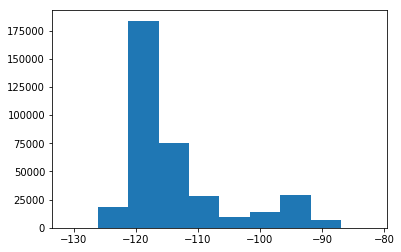

In [11]:
_ = plt.hist(univar)

### Histogram bins: width and number

* the bin width acts as a smoothing factor for the distribution

Text(0.5,1,'Bin width=10 units')

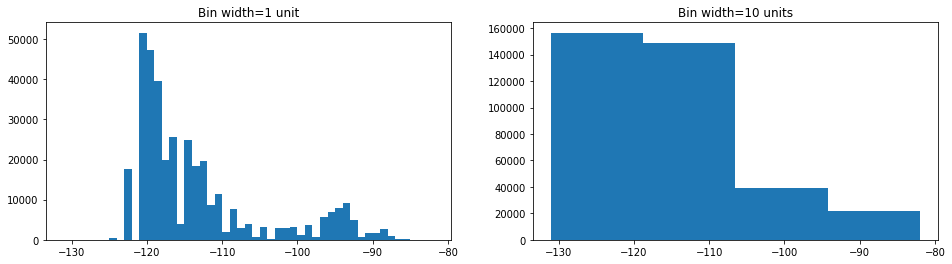

In [12]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.hist(univar, bins=univar.max()-univar.min())
plt.title('Bin width=1 unit')
plt.subplot(1,2,2)
plt.hist(univar, bins=int((univar.max()-univar.min())/10))
plt.title('Bin width=10 units')

### Histogram bins: Scott's normal reference rule

* histograms are a discrete approximation of the continuous distribution
* as the number of samples $\to \infty$ the histogram should show the continuous distribution
* Scott's rule selects the bin width to minimize the difference between the histogram and the density estimate

$h = \frac{3.5\sigma}{\sqrt[3]{n}}$

In [13]:
binwidth = 3.5*np.std(univar)/np.power(len(univar), 1/3)
binwidth

0.42836822855843726

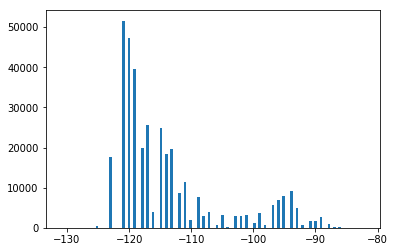

In [14]:
_ = plt.hist(univar, bins=int((univar.max()-univar.min())/binwidth))

* What's happening?
* Scott's rule is designed for __normally__ distributed data
* there are other bin width selection rules for non-normal data.

### Mean

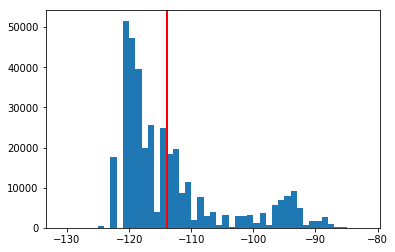

In [15]:
_ = plt.hist(univar, bins=int((univar.max()-univar.min())))
plt.axvline(np.mean(univar), color='red', linewidth=2)

### Median

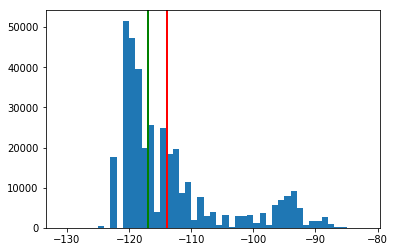

In [16]:
_ = plt.hist(univar, bins=int((univar.max()-univar.min())))
plt.axvline(np.mean(univar), color='red', linewidth=2)
plt.axvline(np.median(univar), color='green', linewidth=2)

### Robustness

* a statistic is robust if moving some of the data will not affect the statistic

### The median is robust

-117.0 -114.0


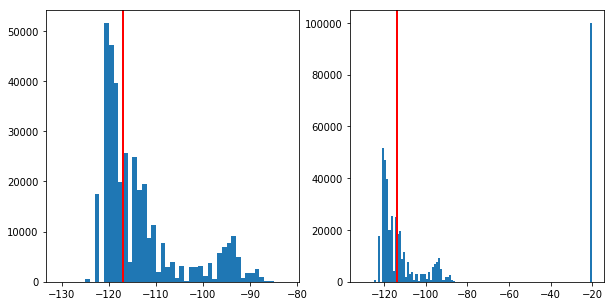

In [17]:
univar_copy = list(univar)
univar_copy.extend([-20]*100000)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(univar, bins=univar.max()-univar.min())
plt.axvline(np.median(univar), color='red', linewidth=2)
plt.subplot(1,2,2)
plt.hist(univar_copy, bins=max(univar_copy)-min(univar_copy))
plt.axvline(np.median(univar_copy), color='red', linewidth=2)
print(np.median(univar), np.median(univar_copy))

### The mean is not robust

-113.88155672052767 -93.75417473313652


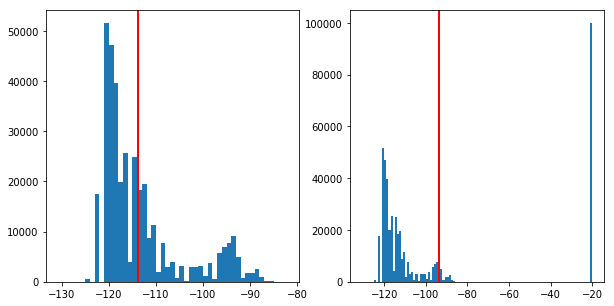

In [18]:
univar_copy = list(univar)
univar_copy.extend([-20]*100000)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(univar, bins=univar.max()-univar.min())
plt.axvline(np.mean(univar), color='red', linewidth=2)
plt.subplot(1,2,2)
plt.hist(univar_copy, bins=max(univar_copy)-min(univar_copy))
plt.axvline(np.mean(univar_copy), color='red', linewidth=2)
print(np.mean(univar), np.mean(univar_copy))

### Box and whiskers plot

![Box and whiskers](https://publiclab.org/system/images/photos/000/032/980/original/Screen_Shot_2019-06-18_at_10.27.45_AM.png)

### Box and whiskers plot, what does it show?

Properties of the distribution
* spread (Inter-Quartile Range)
* skewness
* kurtosis
* tails (heavy left-right)

In [19]:
plt.boxplot?

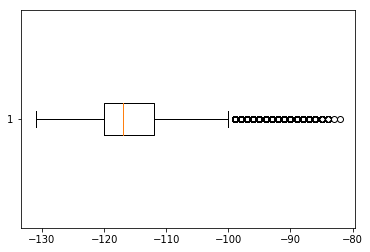

In [20]:
_=plt.boxplot(univar, vert=False)

The whiskers are placed by default at $Q_1-1.5IQR$ and $Q_2+1.5IQR$. They can be changed for example to reflect the $[5,95]$ percentile interval

Anything outside these values is considered outlier.

### Quantile-quantile plot

Analysis of the normality of the data.

<img width=50% src="https://www.mathworks.com/help/examples/stats/win64/QuantileQuantilePlotForNormalDistributionExample_01.png">

How it works:
* plot the data against a normal distribution with the same mean and std dev
* if the data is normal there will be a linear correlation.

### Q-Q plot: normally distributed data

/home/victor/python-local/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


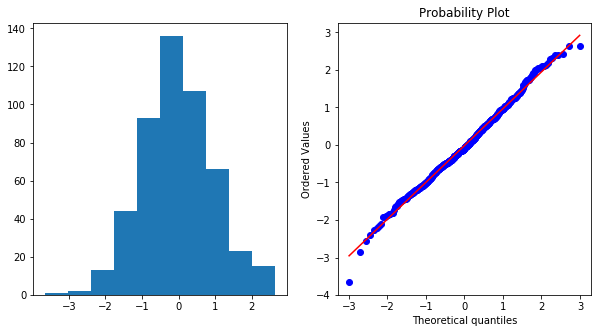

In [21]:
import scipy.stats as stats

seq1 = np.random.normal(0, 1, 500)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(seq1)
plt.subplot(1,2,2)
_=stats.probplot(seq1, dist="norm", plot=plt)

### Q-Q plot: right skewed normal distribution

* distribution has a long __right__ tail
* also known as __positive__ skew

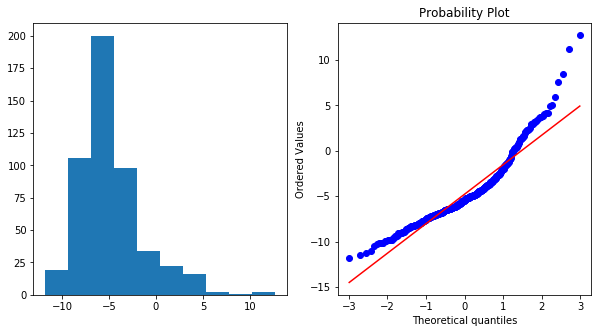

In [22]:
import scipy.stats as stats

seq1 = np.random.normal(0, 4, 100)
seq2 = np.random.normal(-6,2, 400)
seq3 = np.concatenate((seq1, seq2))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(seq3)
plt.subplot(1,2,2)
_=stats.probplot(seq3, dist="norm", plot=plt)

### Q-Q plot: left skewed normal distribution

* distribution has a long __left__ tail
* also known as __negative__ skew

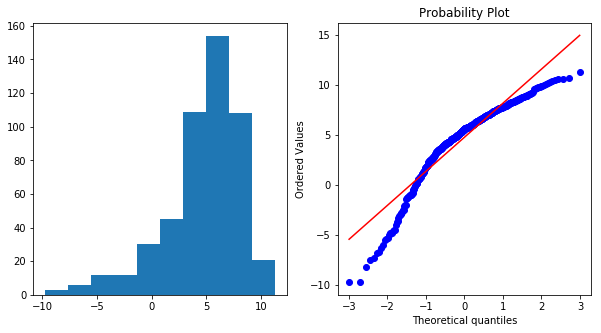

In [23]:
import scipy.stats as stats

seq1 = np.random.normal(0, 4, 100)
seq2 = np.random.normal(6,2,400)
seq3 = np.concatenate((seq1, seq2))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(seq3)
plt.subplot(1,2,2)
_=stats.probplot(seq3, dist="norm", plot=plt)

### Q-Q plot: kurtosis

* leptokurtic distribution
* also known as positive excess kurtosis

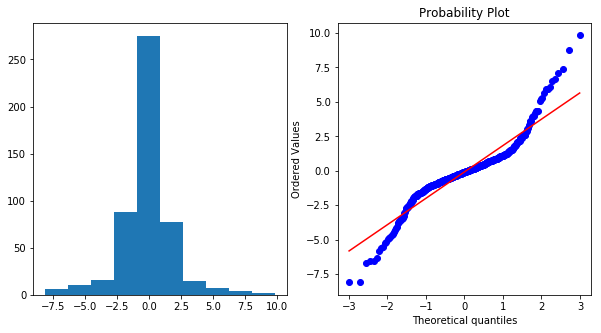

In [24]:
import scipy.stats as stats

seq1 = np.random.normal(0, 4, 100)
seq2 = np.random.normal(0, 1, 400)
seq3 = np.concatenate((seq1, seq2))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(seq3)
plt.subplot(1,2,2)
_=stats.probplot(seq3, dist="norm", plot=plt)

### Data scale and changing the scale

* sometimes the data is polarized between a few very large values and lots of small values

In [12]:
from datetime import datetime
data['timestamps'] = data['UTC timestamp'].apply(lambda s: datetime.strptime(s, "%Y-%m-%d %H:%M:%S.%fZ").timestamp())

ipi = np.diff(data['timestamps'])

KeyError: 'UTC timestamp'

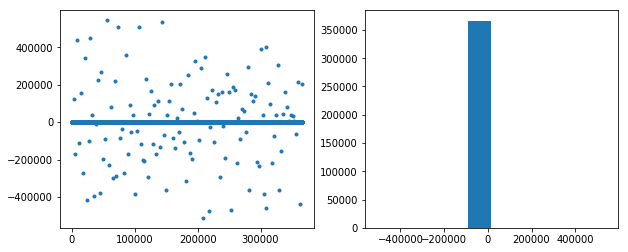

In [46]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ipi, '.')
plt.subplot(1,2,2)
_=plt.hist(ipi)

### Data scale and changing the scale

* in these cases it's useful to change the scale to logarithmic
* this will clearly show the distribution of the data

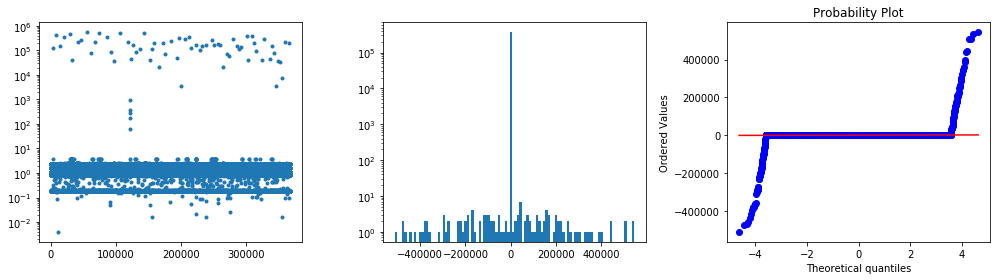

In [47]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(ipi, '.')
plt.yscale('log')
plt.subplot(1,3,2)
_=plt.hist(ipi, bins=100)
plt.yscale('log')
plt.subplot(1,3,3)
_=stats.probplot(ipi, dist='norm', plot=plt)
plt.tight_layout()

# Multivariate data

In [28]:
data.columns

Index(['Unnamed: 0', 'UTC timestamp', 'us count', 'frequency', 'status',
       'size', 'datarate', 'coderate', 'RSSI', 'SNR', 'SNRMIN', 'SNRMAX',
       'payload', 'pld-hdr'],
      dtype='object')

In [29]:
data['status'].value_counts()

CRC_OK     357648
CRC_BAD      8789
Name: status, dtype: int64

In [30]:
data['datarate'].value_counts()

SF12      74222
SF10      74121
SF9       73965
SF8       73138
SF7       70991
Name: datarate, dtype: int64

### Categorical data: frequency analysis

In [31]:
cat_data = pd.DataFrame({'status': data['status'], 'datarate': data['datarate']})

In [32]:
cat_data.groupby(["datarate", "status"]).size()

datarate  status 
SF10      CRC_BAD      520
          CRC_OK     73601
SF12      CRC_OK     74222
SF7       CRC_BAD     4372
          CRC_OK     66619
SF8       CRC_BAD     2741
          CRC_OK     70397
SF9       CRC_BAD     1156
          CRC_OK     72809
dtype: int64

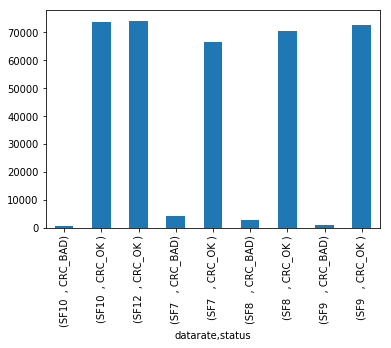

In [33]:
cat_data.groupby(["datarate", "status"]).size().plot.bar()

### Ordinal and mixed data

In [34]:
cat_data = pd.DataFrame({'status': data['status'], 'datarate': data['datarate'], 'snr':data['SNR']})

In [35]:
cat_data.groupby(["datarate", "status"]).describe()

snr                                                   
                    count       mean       std   min   25%   50%   75%   max
datarate status                                                             
SF10     CRC_BAD    520.0  -6.436154  8.040878 -19.2 -14.5  -5.8   1.2   8.2
         CRC_OK   73601.0   0.798334  5.550742 -16.8  -3.0   2.0   5.2  11.0
SF12     CRC_OK   74222.0   6.766277  0.888280  -8.2   6.2   6.8   7.2  10.8
SF7      CRC_BAD   4372.0  -8.410064  2.479495 -14.8  -9.8  -8.8  -7.8   5.5
         CRC_OK   66619.0   1.367008  4.274566 -10.2  -2.0   2.0   4.8   9.8
SF8      CRC_BAD   2741.0 -10.304633  3.787215 -16.8 -12.0 -11.5 -10.5   7.5
         CRC_OK   70397.0   1.391737  5.078246 -12.2  -2.5   2.2   5.5  11.0
SF9      CRC_BAD   1156.0  -9.650173  6.233625 -17.0 -13.8 -13.0  -5.5   7.5
         CRC_OK   72809.0   1.197676  5.634897 -15.8  -3.0   2.2   5.8  12.2

### Mosaic plot

<img src="https://miro.medium.com/max/1636/1*HQ-9olYMSoy-MA2eHQFO7w.png" width=50%/>

* useful for understanding relations and levels for categorical and mixed data
* available in Python through the __statsmodel__ module

### Cross-tabulation

In [36]:
pd.crosstab(data['status'], [data['datarate'], data['SNR'].apply(lambda x: int(x/10))], normalize='columns')

datarate    SF10                  SF12           SF7                 SF8     \
SNR             -1         0    1      0    1        -1         0        -1   
status                                                                        
CRC_BAD   0.049012  0.004633  0.0    0.0  0.0  0.996629  0.049714  0.769334   
CRC_OK    0.950988  0.995367  1.0    1.0  1.0  0.003371  0.950286  0.230666   

datarate                   SF9                    
SNR              0    1        -1         0    1  
status                                            
CRC_BAD   0.006487  0.0  0.205588  0.005423  0.0  
CRC_OK    0.993513  1.0  0.794412  0.994577  1.0

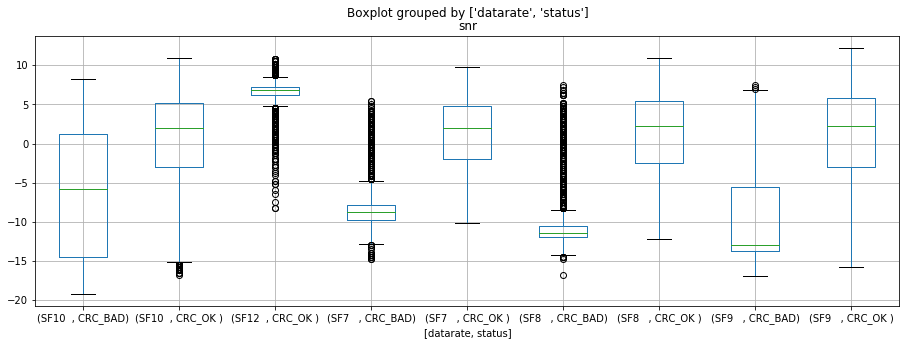

In [37]:
_=cat_data.boxplot(by=['datarate', 'status'], figsize=(15,5))

In [38]:
data['SF'] = data['datarate'].apply(lambda x: int(x.strip()[2:]))
data['status'] = data['status'].apply(lambda x: x.strip())

In [39]:
crc_ok = [data['SNR'][(data['SF']==d) & (data['status']=='CRC_OK')] for d in np.unique(data['SF'].values)]
crc_bad = [data['SNR'][(data['SF']==d) & (data['status']=='CRC_BAD')] for d in np.unique(data['SF'].values)]

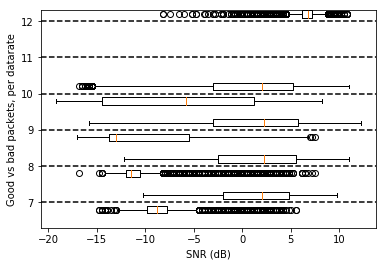

In [40]:
_=plt.boxplot(crc_ok, vert=False, positions=[d+0.2 for d in np.unique(data['SF'].values)], widths=[0.2]*len(np.unique(data['SF'].values)))
_=plt.boxplot(crc_bad, vert=False, positions=[d-0.2 for d in np.unique(data['SF'].values)], widths=[0.2]*len(np.unique(data['SF'].values)))
plt.xlabel('SNR (dB)')
plt.ylabel('Good vs bad packets, per datarate')
_=plt.yticks([7,8,9,10,11,12], [7,8,9,10,11,12])
for d in range(7,13):
    plt.axhline(d, color='k', linestyle='--')

### Correlation: scatterplot

In [41]:
corr_data = pd.DataFrame({'rssi':data['RSSI'], 'snr':data['SNR']})

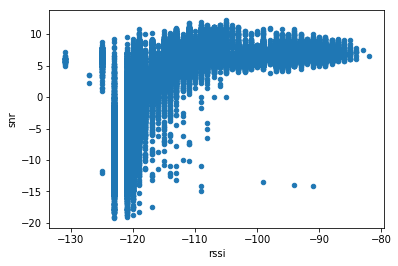

In [42]:
corr_data.plot.scatter(x='rssi', y='snr')

# Timeseries data    

## What does it look like?

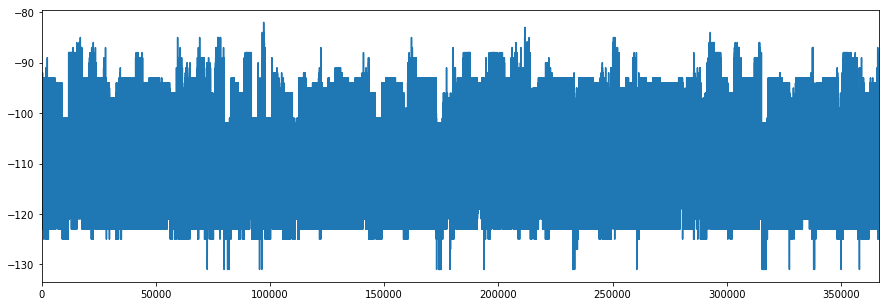

In [43]:
plt.figure(figsize=(15,5))
data['RSSI'].plot()

## Should plot based on time if available

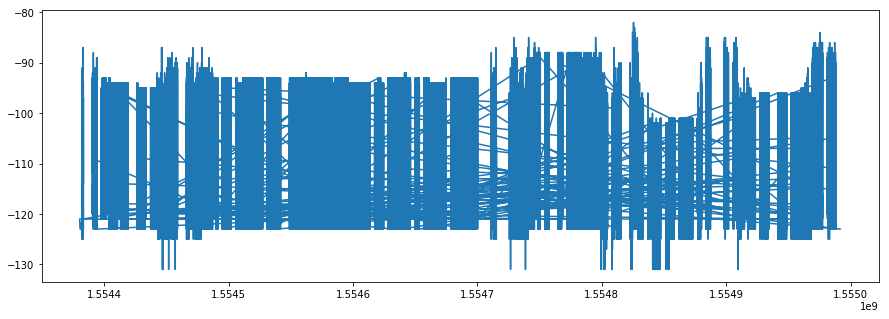

In [51]:
plt.figure(figsize=(15,5))
plt.plot(data['timestamps'], data['RSSI'])

## Data should be sorted

In [53]:
data = data.sort_values(by=['timestamps'])

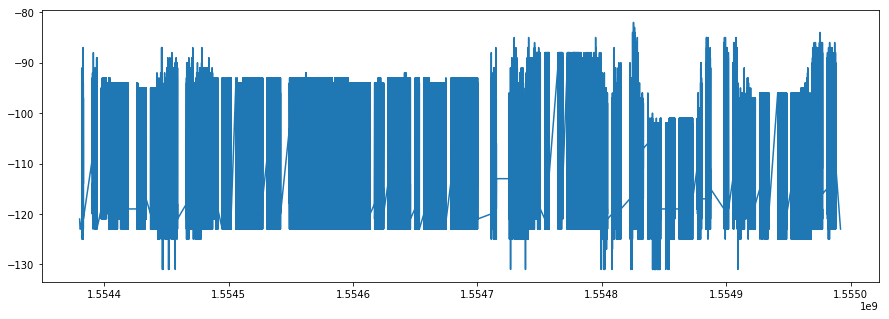

In [55]:
plt.figure(figsize=(15,5))
plt.plot(data['timestamps'], data['RSSI'])

## Sometimes lines can hide important patterns

It's a good idea to plot with the smallest marker possible, no lines

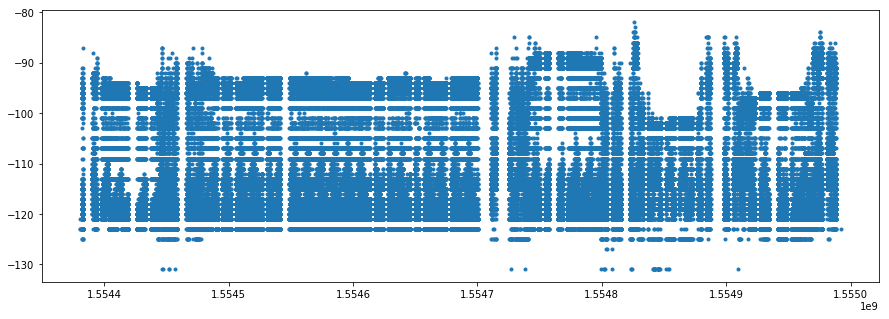

In [56]:
plt.figure(figsize=(15,5))
plt.plot(data['timestamps'], data['RSSI'], '.')

## Use a timestamp that makes sense

In [57]:
from datetime import datetime
data['datetime'] = data['UTC timestamp'].apply(lambda s: datetime.strptime(s, "%Y-%m-%d %H:%M:%S.%fZ"))

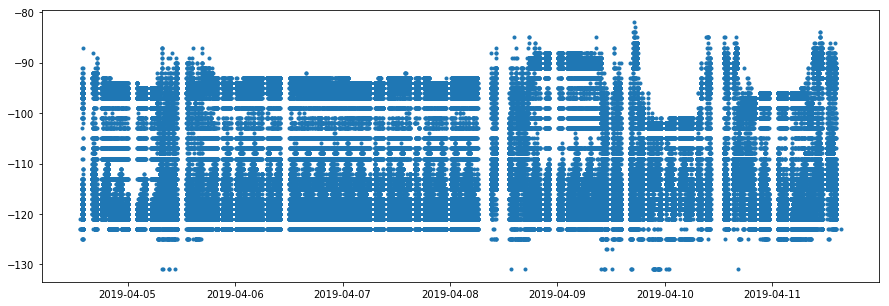

In [58]:
plt.figure(figsize=(15,5))
plt.plot(data['datetime'], data['RSSI'], '.')

## What is important in timeseries analysis?

Long or short term trends

Patterns

## Break it down into "seasons"

* what a season means depends on the data
* can be years, months, days, or even less than that.

In [59]:
data['day'] = data['datetime'].apply(lambda x: x.day)

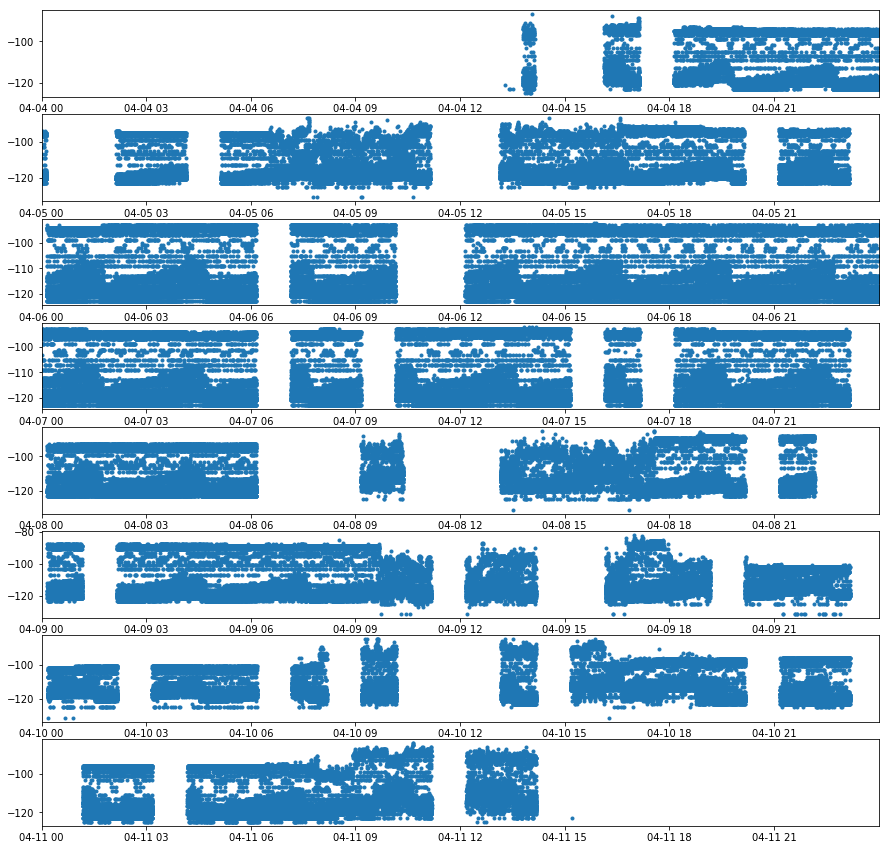

In [63]:
plt.figure(figsize=(15,15))
for day, group in data.groupby(['day']):
    plt.subplot(8,1,day-3)
    plt.plot(group['datetime'], group['RSSI'], '.')
    group_date = group['datetime'].min()
    day_start = datetime(group_date.year, group_date.month, group_date.day)
    day_end = datetime(group_date.year, group_date.month, group_date.day, hour=23, minute=59, second=59)
    plt.xlim([day_start, day_end])

### Let's try a different dataset

In [173]:
data = pd.read_csv('solar_data.csv')

In [4]:
data.columns

Index(['Datetime', 'Zenith', 'Azimuth', 'ETR', 'ETRN', 'GloMod', 'GloModUnc',
       'GloModSource', 'DirMod', 'DirModUnc', 'DirModSource', 'DifMod',
       'DifModUnc', 'DifModSource', 'MeasGlo', 'MeasGloFlg', 'MeasDir',
       'MeasDirFlg', 'MeasDif', 'MeasDifFlg', 'TotCC', 'PrecipWat',
       'PrecipWatFlg', 'AOD', 'AODFlg'],
      dtype='object')

In [174]:
data['MeasDir'] = data['MeasDir'].replace(-9900, None)

In [175]:
data['timestamp'] = data['Datetime'].apply(lambda s: datetime.strptime(s, "%Y-%m-%d-%H:%M"))

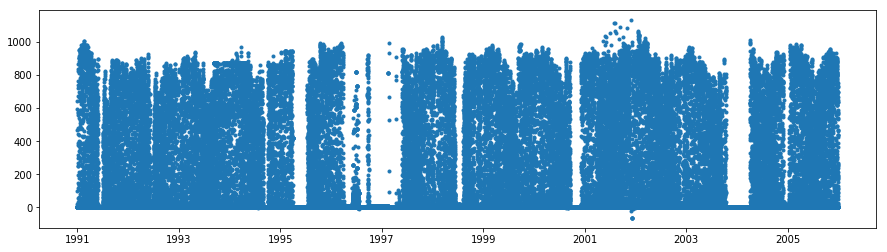

In [37]:
plt.figure(figsize=(15,4))
plt.plot(data['timestamp'], data['MeasDir'], '.')

## Break down into seasons

* year, month, and day

In [177]:
data['year'] = data['timestamp'].apply(lambda x:x.year)
data['month'] = data['timestamp'].apply(lambda x:x.month)
data['day'] = data['timestamp'].apply(lambda x:x.day)

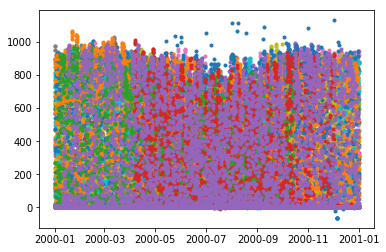

In [38]:
for year, gr in data.groupby(['year']):
    plt.plot(gr['timestamp'].apply(lambda x:datetime(2000,x.month, x.day, x.hour)), gr['MeasDir'], '.')


### Plotting the data grouped over the days of the month shows the daily pattern

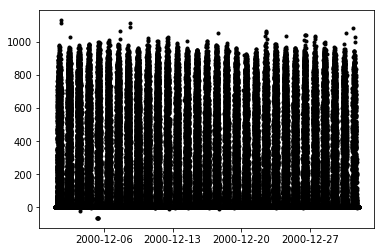

In [40]:
for month, gr in data.groupby(['month']):
    plt.plot(gr['timestamp'].apply(lambda x:datetime(2000,12, x.day, x.hour)), gr['MeasDir'], 'k.')

### Plotting over the hours of the days confirms that pattern

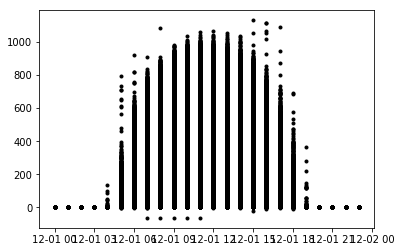

In [41]:
for day, gr in data.groupby(['day']):
    plt.plot(gr['timestamp'].apply(lambda x:datetime(2000,12, 1, x.hour)), gr['MeasDir'], 'k.')

### We can see seasonal variation if we plot the distribution for each month

#### As expected, more energy during the summer months, less during winter

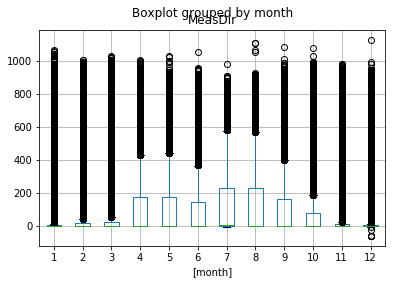

In [49]:
data.boxplot(column=['MeasDir'], by=['month'])

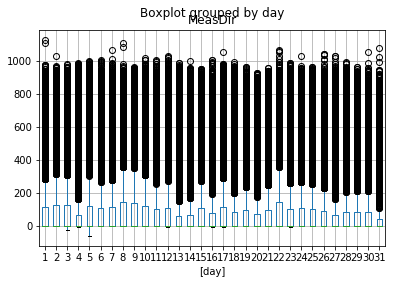

In [50]:
data.boxplot(column=['MeasDir'], by=['day'])

### Window smooting

In [178]:
_=data.set_index('timestamp', inplace=True)

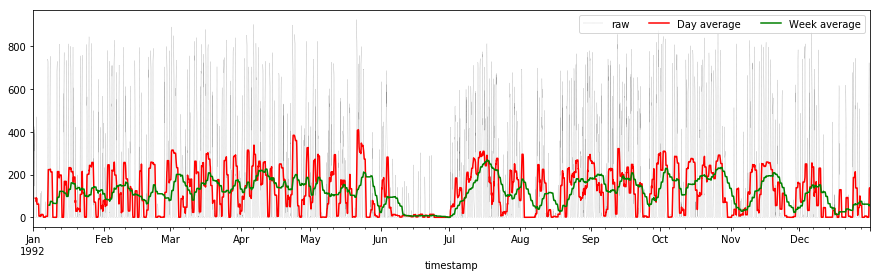

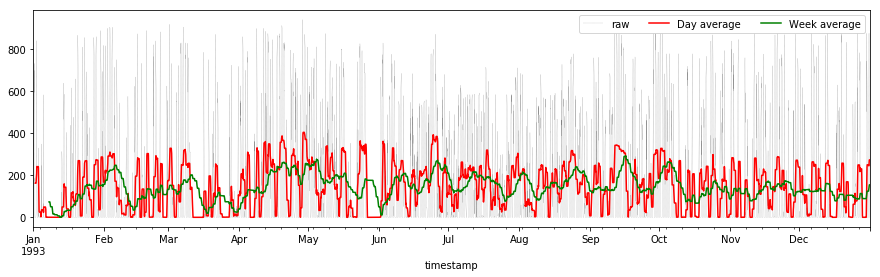

In [112]:
for year in range(1992,1994):
    plt.figure(figsize=(15,4))
    data['MeasDir'][data['year'] == year].plot(style='k--', linewidth=0.1, label='raw')
    day_means_rolling = data['MeasDir'][data['year'] == year].rolling(window=24)
    day_means_rolling.mean().plot(style='r-', label='Day average')
    day_means_rolling = data['MeasDir'][data['year'] == year].rolling(window=7*24)
    day_means_rolling.mean().plot(style='g-', label='Week average')
    plt.legend(ncol=3)

## Autocorrelation

Useful for identifying patterns in the data

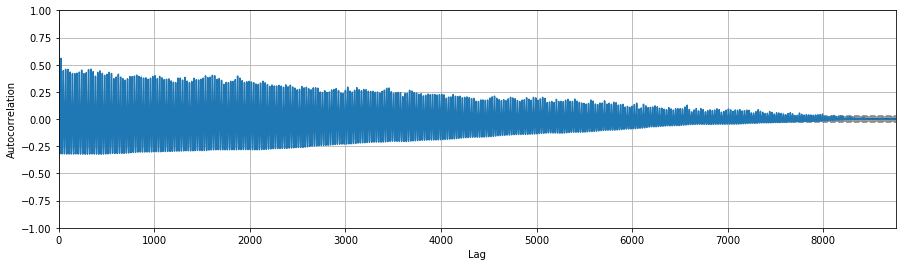

In [116]:
plt.figure(figsize=(15,4))
pd.plotting.autocorrelation_plot(data['MeasDir'][data['year']==1993])

(1.0, 744)

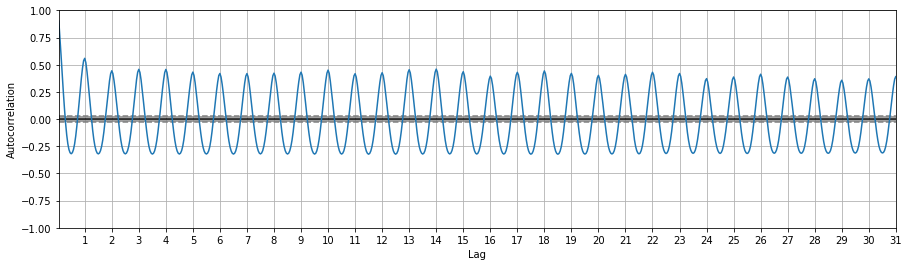

In [125]:
plt.figure(figsize=(15,4))
pd.plotting.autocorrelation_plot(data['MeasDir'][data['year']==1993])
_=plt.xticks([24*i for i in range(1,100)], range(1,100))
plt.xlim([None,31*24])

## Periodogram

Analyzes the spectrum of the data.

Useful for identifying patterns in the data.

In [196]:
from scipy.signal import periodogram

Max at 24.00h


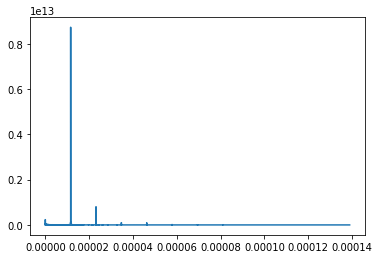

In [205]:
freq, powdens = periodogram(data['MeasDir'], fs=1/3600)
plt.plot(freq, powdens)
print('Max at %0.2fh'%((1/freq[powdens.argmax()])/3600))

## Trends in data

In [188]:
airline = pd.read_csv('airline-passengers.csv', index_col=0)
print(airline.head(10))

         Passengers
Month              
1949-01         112
1949-02         118
1949-03         132
1949-04         129
1949-05         121
1949-06         135
1949-07         148
1949-08         148
1949-09         136
1949-10         119


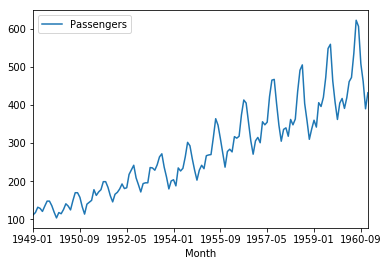

In [189]:
airline.plot()

### Smoothing again

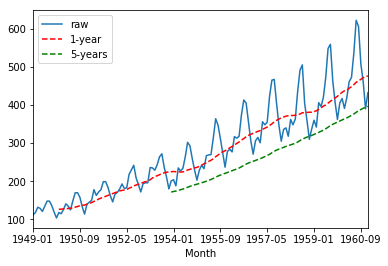

In [190]:
ax = airline.plot(legend=False)
yearly = airline.rolling(window=12)
five_yearly = airline.rolling(window=12*5)
yearly.mean().plot(ax=ax,style='r--', legend=False)
five_yearly.mean().plot(ax=ax,style='g--', legend=False)
ax.legend(['raw', '1-year', '5-years'])

## Seasonal decomposition of data

A timeseries can be decomposed as $y=\text{Trend}+\text{Seasonal}+\text{Residual}$

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [191]:
airline = pd.read_csv('airline-passengers.csv')
airline['timestamp'] = pd.to_datetime(airline['Month'])
airline = airline.set_index('timestamp')
decomposition = seasonal_decompose(airline['Passengers'], model='additive')

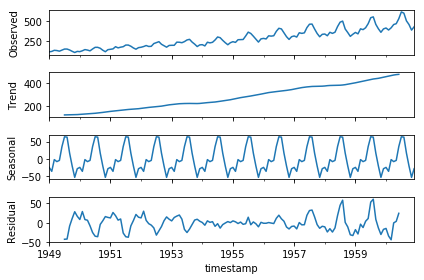

In [160]:
_=decomposition.plot()

### Also multiplicative model

$y=\text{Trend} * \text{Seasonal} * \text{Residual}$

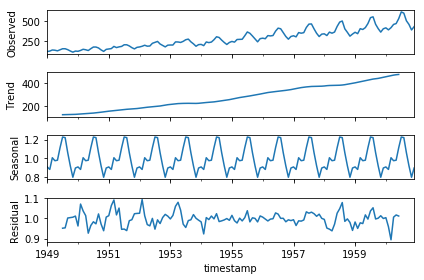

In [192]:
decomposition = seasonal_decompose(airline['Passengers'], model='multiplicative')
_=decomposition.plot()